# Relationships
### Exploratory Data Analysis in Python
####  Career track : Data Analyts with Python 
##### DataCamp - 2020
##### Karen Jimenez

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

#Read the dataset
brfss_orig = pd.read_hdf('brfss.hdf5', 'brfss')
brfss_orig.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


## PMF on age

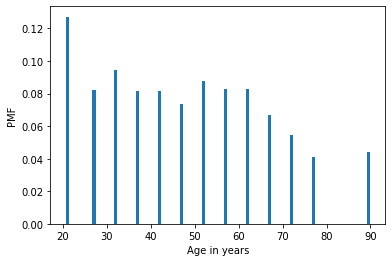

In [13]:
# Extract AGE
age = brfss_orig['AGE']

# Plot the PMF
Pmf.from_seq(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot

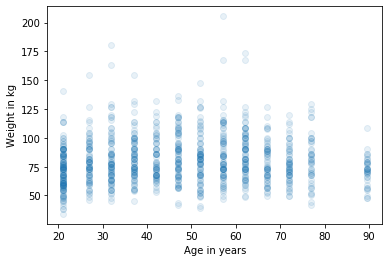

In [14]:
# Select the first 1000 respondents
brfss = brfss_orig[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

Text(0, 0.5, 'Weight in kg')

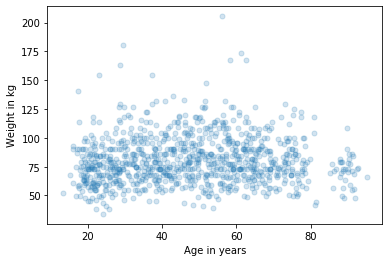

In [15]:
# Select the first 1000 respondents
brfss = brfss_orig[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize= 5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')


#By smoothing out the ages and avoiding saturation, we get the best view of the data. 
#But in this case the nature of the relationship is still hard to see. 

# Visualizing relationships

## Height and Weight

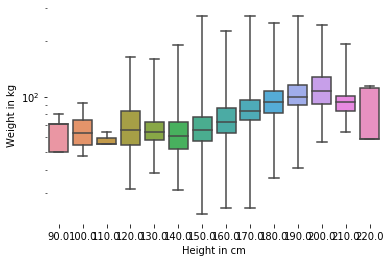

In [16]:
# Drop rows with missing data
data = brfss_orig.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data = data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## These box plots provide a good view of the relationship between the variables. 
## They also show the spread of the values in each column.

# Distribution of income

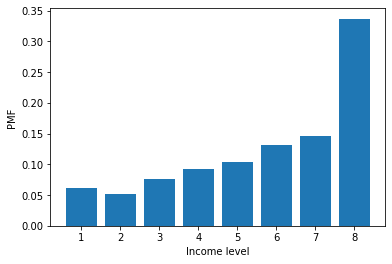

In [17]:
# Extract income
income = brfss_orig['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

# Income and height

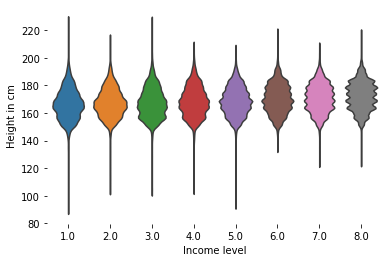

In [18]:
# Drop rows with missing data
data = brfss_orig.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Computing correlations

In [19]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_orig[columns]

# Compute the correlation matrix
print(subset.corr())

#The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. 
#But a correlation close to 0 does mean there is no relationship.

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## Income and vegetables

In [20]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)
#The estimated slope tells you the increase in vegetable servings from one income group to the next.

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426)


## Fit a line

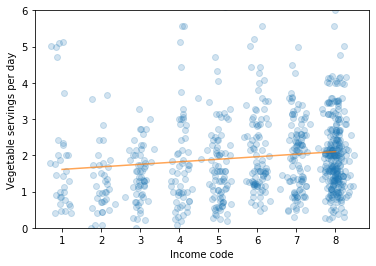

In [21]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()